In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
br = pd.read_csv("bronx.csv")

### true average wait times, as we define them (call placed to ambulance dispatched)

In [4]:
# determine average time between when a call is placed and when an ambulance is assigned to the call
# (what we're actually measuring)

# this is for all calls
calltime = []
for row in br['INCIDENT_DATETIME']:
    idt = row.replace("T", " ")
    calltime.append(dt.datetime.strptime(idt, '%Y-%m-%d %H:%M:%S.%f'))
    
calltime.reverse() #because the data is saved from 12/31/2018-1/1/2015

arrivaltime = []
for row in br['FIRST_ASSIGNMENT_DATETIME']:
    if type(row) == str:
        idt = row.replace("T", " ")
        arrivaltime.append(dt.datetime.strptime(idt, '%Y-%m-%d %H:%M:%S.%f'))
    else:
        arrivaltime.append("del")
arrivaltime.reverse() #because the data is saved from 12/31/2018-1/1/2015

In [5]:
#where calls not dispatched
indstodel = [i for i, j in enumerate(arrivaltime) if j == 'del']
len(indstodel)
for i in range(len(indstodel)-1,-1, -1):
    del calltime[indstodel[i]]
    del arrivaltime[indstodel[i]]

In [7]:
waittimes = [arrivaltime[i] - calltime[i] for i in range(len(arrivaltime))]
avgwaittime = np.mean(waittimes)
avgwaittime.seconds/60
#np.sum([4, 56, 2, 38, 19, 1, 1, 103, 168, 2])/10

1.8166666666666667

In [27]:
# for weekday only (since this is what we ran our simulation intervals on)
calltime_wkd = []
for row in br['INCIDENT_DATETIME']:
    idt = row.replace("T", " ")
    asDT = dt.datetime.strptime(idt, '%Y-%m-%d %H:%M:%S.%f')
    if asDT.weekday() <= 4:
        calltime_wkd.append(asDT)
    else:
        calltime_wkd.append("del")
    
calltime_wkd.reverse() #because the data is saved from 12/31/2018-1/1/2015

arrivaltime_wkd = []
for row in br['FIRST_ASSIGNMENT_DATETIME']:
    if type(row) == str:
        idt = row.replace("T", " ")
        asDT = dt.datetime.strptime(idt, '%Y-%m-%d %H:%M:%S.%f')
        if asDT.weekday() <= 4:
            arrivaltime_wkd.append(asDT)
        else:
            arrivaltime_wkd.append("del")
    else:
        arrivaltime_wkd.append("del")
arrivaltime_wkd.reverse() #because the data is saved from 12/31/2018-1/1/2015

print(len(calltime_wkd))
print(len(arrivaltime_wkd))

1367709
1367709


In [28]:
#where calls not dispatched
indstodel = [i for i, j in enumerate(calltime_wkd) if j == 'del']
print(len(indstodel))
for i in range(len(indstodel)-1,-1, -1):
    del calltime_wkd[indstodel[i]]
    del arrivaltime_wkd[indstodel[i]]

372775


In [29]:
print(len(calltime_wkd))
print(len(arrivaltime_wkd))

994934
994934


In [30]:
indstodel2 = [i for i, j in enumerate(arrivaltime_wkd) if j == 'del']
indstodel2
for i in range(len(indstodel2)-1,-1, -1):
    del calltime_wkd[indstodel2[i]]
    del arrivaltime_wkd[indstodel2[i]]

In [31]:
waittimes_wkd = [arrivaltime_wkd[i] - calltime_wkd[i] for i in range(len(arrivaltime_wkd))]
avgwaittime_wkd = np.mean(waittimes_wkd)
avgwaittime_wkd.seconds/60

1.9666666666666666

In [37]:
# for weekend only
calltime_wke = []
for row in br['INCIDENT_DATETIME']:
    idt = row.replace("T", " ")
    asDT = dt.datetime.strptime(idt, '%Y-%m-%d %H:%M:%S.%f')
    if asDT.weekday() <= 4:
        calltime_wke.append(asDT)
    else:
        calltime_wke.append("del")
    
calltime_wkd.reverse() #because the data is saved from 12/31/2018-1/1/2015

arrivaltime_wke = []
for row in br['FIRST_ASSIGNMENT_DATETIME']:
    if type(row) == str:
        idt = row.replace("T", " ")
        asDT = dt.datetime.strptime(idt, '%Y-%m-%d %H:%M:%S.%f')
        if asDT.weekday() <= 4:
            arrivaltime_wke.append(asDT)
        else:
            arrivaltime_wke.append("del")
    else:
        arrivaltime_wke.append("del")
arrivaltime_wke.reverse() #because the data is saved from 12/31/2018-1/1/2015

print(len(calltime_wke))
print(len(arrivaltime_wke))

1367709
1367709


In [38]:
#where calls not dispatched
indstodel = [i for i, j in enumerate(calltime_wke) if j == 'del']
print(len(indstodel))
for i in range(len(indstodel)-1,-1, -1):
    del calltime_wke[indstodel[i]]
    del arrivaltime_wke[indstodel[i]]

372775


In [ ]:
indstodel2 = [i for i, j in enumerate(arrivaltime_wke) if j == 'del']
indstodel2
for i in range(len(indstodel2)-1,-1, -1):
    del calltime_wke[indstodel2[i]]
    del arrivaltime_wke[indstodel2[i]]

In [ ]:
waittimes_wkd = [arrivaltime_wke[i] - calltime_wke[i] for i in range(len(arrivaltime_wke))]
avgwaittime_wke = np.mean(waittimes_wke)
avgwaittime_wke.seconds/60

#### graphical results to determine elbow number of ambulances

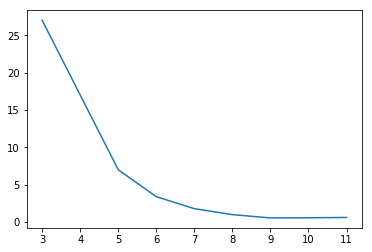

In [39]:
# testing for one sample run of our simulation
x = [3, 4, 5, 6, 7, 8, 9, 10, 11]
y = [27, 17, 7, 3.4, 1.8, 1, .56, .58, .62]

plt.plot(x, y)
plt.show()

In [127]:
y1 = [0.0, 0.05, 0.9, 0.5666666666666667, 0.2, 1.4, 1.6, 1.7, 0.5, 0.2, 0.5, 1.35, 0.3, 1.25, 0.6, 0.8333333333333333, 0.4833333333333333, 0.0, 2.1, 1.5, 1.5, 0.0, 0.2, 0.65, 0.3, 0.4, 1.1, 0.25, 0.3, 1.1, 0.2, 0.0, 0.2, 0.1, 0.0, 0.4, 0.2, 0.95, 0.25, 0.15, 0.0, 0.0, 0.6, 0.75, 0.8, 1.05, 0.4666666666666666, 0.85, 0.925, 0.11666666666666665, 0.0, 0.9833333333333334, 0.8, 1.25, 0.55, 0.1, 0.45, 0.55, 1.75, 0.03333333333333333, 1.5, 1.9333333333333331, 3.4, 3.7, 2.55, 3.35, 3.65, 0.1, 2.486666666666667, 3.25, 1.4, 1.65, 1.025, 0.2, 0.25, 0.9333333333333332, 1.9666666666666663, 2.9, 2.5, 1.6, 1.85, 3.0, 1.45, 2.683333333333333, 0.325, 0.16666666666666669, 1.05, 0.5, 0.08333333333333333, 1.35, 1.6166666666666665, 1.5833333333333333, 1.3, 0.7666666666666667, 0.7333333333333333]
y2 = [0.13333333333333333, 0.2, 0.15, 0.05, 0.45, 0.5666666666666667, 0.13333333333333333, 1.4, 0.3166666666666667, 2.7416666666666667, 1.35, 0.35, 0.55, 0.5666666666666667, 0.1, 0.1, 0.6333333333333333, 0.75, 2.0, 1.0, 1.1, 0.05, 0.35, 0.1, 0.0, 0.3, 0.0, 0.6, 0.3, 0.0, 0.15, 0.1, 0.0, 0.25, 0.2, 0.18333333333333332, 1.2, 0.4, 2.0, 0.05, 0.13333333333333333, 0.18333333333333332, 0.0, 0.1, 0.3, 0.75, 0.8, 0.6666666666666667, 0.6, 1.35, 0.7, 0.3, 0.3, 1.0, 0.15, 0.225, 0.425, 2.05, 0.7666666666666667, 0.1, 0.25, 0.925, 1.7, 2.25, 1.8, 2.166666666666667, 2.566666666666667, 3.6, 3.45, 3.1166666666666667, 3.1333333333333333, 4.316666666666666, 4.2, 1.35, 1.65, 3.4333333333333327, 4.05, 4.2, 2.6333333333333337, 1.85, 3.7833333333333337, 2.9, 1.4, 3.05, 3.25, 5.05, 0.95, 1.1, 1.4, 1.675, 1.5, 2.5, 1.8166666666666669, 1.9333333333333336, 0.15]
y3 = [0.02, 0.0, 0.4, 0.1, 2.0, 1.7166666666666663, 0.4333333333333333, 0.4333333333333334, 1.0, 0.45, 0.1, 0.36666666666666664, 0.1, 0.38333333333333336, 0.65, 0.2333333333333333, 0.65, 0.1, 0.04, 0.0, 0.6, 0.0, 0.3, 0.05, 0.0, 0.9833333333333334, 0.0, 0.15, 0.13333333333333333, 0.0, 0.3, 0.3, 0.1, 0.0, 0.3, 0.0, 0.0, 0.25, 0.5, 0.6, 1.3166666666666667, 2.166666666666667, 1.8999999999999997, 1.5, 1.45, 2.033333333333333, 1.9, 1.8666666666666665, 0.55, 2.15, 0.25, 0.2333333333333333, 0.35, 0.2, 0.7583333333333333, 0.1, 0.1, 0.2, 0.85, 0.2, 1.7, 1.8166666666666669, 0.3, 0.15, 0.7333333333333334, 1.6333333333333333, 0.9833333333333334, 0.4, 1.1, 0.06999999999999999, 1.675, 1.95, 4.5, 1.56, 0.1, 2.85, 0.06666666666666667, 1.1833333333333333, 1.9833333333333332, 0.7, 3.45, 3.6, 3.525, 1.15, 3.4, 5.1, 2.6, 2.8666666666666663, 1.55, 2.816666666666667, 3.0, 1.35, 1.4333333333333333, 1.9, 2.225]
y4 = [0.0, 0.45, 0.1, 0.5, 0.2, 1.3, 0.0, 2.65, 0.8, 0.3, 0.4, 0.45, 0.5, 0.1, 0.3, 0.1, 0.4, 0.5, 0.2, 0.5, 0.3, 0.13333333333333333, 0.5, 0.0, 0.3, 0.05, 0.1, 0.5333333333333333, 0.4, 0.45, 0.15, 0.26666666666666666, 0.6166666666666666, 0.25, 0.13333333333333333, 0.0, 0.6, 0.0, 0.0, 0.25, 0.3, 0.05, 1.3, 0.7333333333333333, 0.7833333333333334, 0.9333333333333333, 2.9, 1.425, 0.2333333333333333, 0.35, 0.0, 1.3333333333333335, 3.4416666666666664, 1.75, 0.35, 1.81, 1.55, 3.075, 3.8166666666666673, 1.1333333333333333, 4.7, 4.733333333333333, 0.0, 5.6, 2.7666666666666666, 1.085, 4.3, 4.09, 1.75, 2.5, 1.5, 0.5666666666666667, 0.9333333333333332, 1.1, 2.7, 3.2, 4.175, 4.85, 5.4, 4.15, 4.183333333333334, 4.05, 5.05, 4.883333333333334, 7.2, 5.85, 4.65, 6.0, 3.3166666666666664, 2.1, 2.3, 3.1333333333333333, 4.6, 4.95, 4.7]
y5 = [0.0, 0.3, 0.7333333333333333, 0.1, 1.4, 0.375, 0.65, 0.0, 0.1, 0.18333333333333332, 0.8, 0.1, 1.55, 0.4333333333333333, 0.75, 0.7833333333333333, 0.7, 0.5, 1.825, 2.2, 0.95, 0.05, 0.25, 0.8, 0.0, 0.0, 0.0, 0.03333333333333333, 0.2, 0.6, 0.2, 0.25, 0.4, 0.1, 0.0, 0.2, 1.0, 0.25, 0.0, 0.0, 0.3, 1.15, 0.6, 0.26666666666666666, 0.4, 0.2, 0.275, 0.15, 1.3333333333333335, 2.35, 1.55, 1.35, 1.775, 0.6, 0.625, 0.38333333333333336, 0.4833333333333333, 1.25, 1.9, 3.4, 3.375, 3.95, 5.383333333333334, 4.7, 4.7, 3.9, 2.925, 0.6, 2.3, 2.0, 3.1, 5.25, 2.583333333333333, 0.7833333333333333, 2.8, 1.5583333333333331, 0.875, 0.6333333333333334, 1.3, 1.7833333333333332, 1.8333333333333328, 0.75, 1.09, 0.2, 0.475, 1.2, 2.05, 1.65, 2.0416666666666665, 1.5, 0.0, 1.1, 1.35, 0.65, 1.275]
y6 = [0.0, 0.5, 0.3, 0.5333333333333333, 0.03333333333333333, 0.1, 0.0, 0.0, 0.13333333333333333, 0.3, 0.3, 0.0, 0.35, 0.4, 0.7, 0.5333333333333333, 0.05, 0.4, 0.1, 0.0, 0.4, 0.475, 0.2, 0.0, 0.2, 0.3, 0.3, 0.0, 0.1, 0.05, 0.08, 0.3, 0.0, 0.4, 0.1, 0.0, 0.0, 0.75, 0.3, 0.0, 0.3, 0.3, 0.45, 0.2, 0.3, 0.5666666666666667, 2.9, 1.6, 1.425, 1.5, 0.9333333333333333, 1.1, 0.6, 0.0, 0.275, 1.2, 1.0333333333333334, 0.0, 0.375, 1.6, 2.525, 2.85, 2.1, 1.1666666666666665, 1.675, 0.55, 1.8166666666666669, 1.7333333333333336, 0.35, 1.1666666666666665, 0.5, 0.9333333333333332, 0.975, 0.0, 1.3166666666666667, 0.6666666666666667, 1.4, 1.3833333333333333, 2.05, 2.1166666666666667, 1.9, 1.7, 1.9166666666666667, 1.55, 3.1, 0.95, 2.7, 3.1, 3.416666666666667, 2.675, 0.21666666666666665, 0.65, 3.0666666666666664, 4.95, 1.825]
y7 = [0.05, 0.13333333333333333, 0.35, 0.65, 0.6166666666666666, 1.65, 0.6, 0.8833333333333334, 0.85, 0.5, 0.375, 0.0, 0.3, 0.35, 0.2, 0.0, 0.35, 0.55, 0.3833333333333333, 0.1, 0.0, 0.0, 0.6, 0.25, 0.3, 0.1, 0.1, 0.0, 0.05, 0.05, 0.55, 0.65, 0.2, 0.125, 0.6, 0.2, 0.0, 0.65, 0.2, 0.4, 0.65, 0.2, 0.0, 0.11666666666666665, 0.1, 0.1, 0.9, 1.9, 1.6166666666666665, 1.3, 1.7833333333333332, 0.85, 0.15, 0.4, 1.3333333333333335, 0.45, 2.1, 0.4333333333333334, 0.15, 0.36666666666666664, 0.6166666666666667, 1.8, 3.25, 2.925, 0.7, 1.8, 0.55, 0.6, 2.3, 4.5, 2.3, 0.7, 3.733333333333333, 3.1416666666666666, 3.6333333333333337, 4.075, 4.45, 3.0166666666666666, 3.2, 2.308333333333333, 3.1, 2.8, 3.6916666666666664, 3.15, 5.825, 3.625, 0.95, 1.2, 1.175, 2.7, 2.4, 0.6900000000000001, 0.375, 1.9, 2.5]
y8 = [0.0, 0.55, 0.0, 0.1, 0.0, 0.4, 0.3, 0.425, 0.9, 0.0, 0.5, 0.1, 0.45, 0.0, 0.0, 0.1, 0.6, 0.0, 0.2, 0.0, 0.6, 0.175, 0.0, 0.6, 0.4, 0.3833333333333333, 0.4, 0.4, 0.9, 0.2, 0.0, 0.11666666666666665, 0.9, 0.0, 1.45, 1.2, 0.9, 0.0, 0.65, 0.125, 1.05, 1.1, 2.066666666666667, 1.65, 2.7, 2.783333333333333, 4.0, 4.8, 5.200000000000001, 6.083333333333334, 6.55, 6.4, 5.0, 2.325, 2.1333333333333333, 2.0, 0.9, 1.1800000000000002, 0.26666666666666666, 0.275, 0.13333333333333333, 1.34, 1.6666666666666667, 2.725, 3.0, 2.4, 1.9333333333333331, 1.7166666666666663, 2.0, 2.25, 2.7, 2.4, 3.2, 2.533333333333333, 1.75, 1.0166666666666666, 1.4166666666666667, 0.5833333333333333, 1.1666666666666665, 1.1083333333333332, 1.4083333333333334, 0.0, 0.9833333333333334, 0.5333333333333333, 0.8, 2.2666666666666666, 1.6666666666666667, 1.35, 0.6, 1.95, 1.7666666666666664, 0.7, 1.6166666666666667, 1.9666666666666668, 1.5]
y9 = [0.0, 0.1, 0.0, 0.8833333333333334, 0.41666666666666663, 0.6, 0.5333333333333333, 0.55, 0.4, 1.3333333333333335, 1.75, 0.2833333333333333, 0.7, 0.5333333333333334, 1.5, 1.25, 2.0, 0.0, 0.0, 0.4, 0.05, 0.0, 0.26666666666666666, 0.5333333333333333, 0.3, 0.0, 0.7, 0.35, 0.2, 0.1, 0.26666666666666666, 0.1, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.03333333333333333, 0.45, 0.45, 0.15, 0.1, 0.4, 0.33333333333333337, 0.9, 0.2333333333333333, 1.15, 0.26666666666666666, 1.05, 1.5, 0.9333333333333333, 0.6, 1.55, 1.15, 0.75, 1.1333333333333333, 0.4166666666666667, 0.9666666666666666, 1.7, 1.275, 1.0, 1.95, 2.1333333333333333, 1.8666666666666667, 2.05, 1.8833333333333335, 0.0, 0.55, 2.583333333333333, 2.35, 2.2, 2.1166666666666663, 1.7, 0.45, 0.0, 0.8166666666666667, 2.1, 2.8666666666666667, 0.7666666666666666, 2.25, 0.6733333333333333, 0.8333333333333334, 0.25, 0.95, 4.95, 2.5833333333333335, 0.0, 0.9, 1.25, 1.9333333333333336, 0.7, 0.3, 0.95, 0.35, 0.0]
y10 = [0.0, 0.7666666666666666, 1.0, 0.0, 0.25, 0.2, 0.15, 1.0333333333333334, 0.6, 0.75, 0.05, 0.8, 0.05, 0.4, 0.05, 0.0, 1.5, 0.7, 0.3, 0.65, 0.0, 0.25, 0.0, 0.0, 0.03333333333333333, 0.2, 0.1, 0.0, 0.35, 0.7, 0.3, 0.05, 0.0, 0.1, 0.4, 0.38333333333333336, 0.0, 0.45, 0.1, 0.55, 0.3, 0.05, 0.15, 0.25, 0.1, 0.375, 0.6166666666666666, 0.1, 1.4666666666666666, 2.2166666666666663, 1.1333333333333333, 0.9, 2.9, 1.7, 1.0, 0.85, 0.45, 2.05, 2.225, 1.4666666666666666, 1.75, 2.825, 2.2333333333333334, 1.4916666666666667, 0.05, 0.8, 0.45, 1.1833333333333333, 1.675, 1.4, 1.7, 2.4833333333333334, 1.85, 1.3166666666666667, 5.05, 4.3, 0.75, 0.8, 0.4, 0.325, 0.36666666666666664, 1.6, 2.666666666666667, 2.791666666666667, 3.0, 4.6, 6.391666666666667, 7.5, 7.75, 7.091666666666667, 4.4, 5.0, 4.3, 5.275, 5.0]
y11 = [0.0, 0.2, 0.2, 0.1, 0.2333333333333333, 0.2666666666666667, 0.13333333333333333, 0.15, 0.6166666666666666, 2.5, 1.3333333333333335, 2.2399999999999998, 0.5, 0.1, 0.4, 0.0, 0.8833333333333332, 0.13333333333333333, 0.13333333333333333, 0.55, 0.0, 0.0, 0.5, 0.1, 0.0, 0.8, 0.0, 0.2, 0.6, 0.2833333333333333, 0.55, 0.0, 0.15, 0.36666666666666664, 0.1, 0.5, 0.36666666666666664, 0.8, 0.2, 0.55, 0.25, 1.7, 2.35, 2.5, 2.45, 2.8666666666666667, 3.0166666666666666, 4.3, 4.15, 2.1416666666666666, 1.75, 4.2, 4.566666666666667, 1.775, 2.25, 4.75, 2.95, 4.0, 4.066666666666666, 6.0, 5.175, 4.5, 3.4, 4.15, 0.0, 0.6, 1.2666666666666666, 0.25, 2.3666666666666667, 0.55, 0.5166666666666667, 0.8333333333333334, 1.8, 3.95, 2.825, 4.5, 6.075, 4.225, 4.708333333333334, 6.4, 5.675, 3.25, 2.0, 1.6, 3.3649999999999998, 5.2, 2.925, 2.316666666666667, 3.0, 4.325, 5.566666666666667, 4.783333333333333, 3.8833333333333337, 2.55, 1.7]
y12 = [0.0, 0.45, 0.06666666666666667, 0.15, 1.75, 1.3199999999999998, 0.36666666666666664, 2.3, 1.5583333333333333, 0.25, 1.8, 0.7, 0.05, 0.4666666666666666, 0.0, 0.2, 0.7833333333333333, 0.4, 0.0, 0.1, 0.7, 0.3, 0.1, 0.03333333333333333, 0.0, 0.35, 0.7, 0.0, 0.4, 0.03333333333333333, 0.4, 0.15, 1.4, 0.0, 0.3, 0.2833333333333333, 0.55, 0.0, 0.15, 0.0, 0.35, 0.9, 0.0, 0.3, 1.3333333333333335, 1.2, 0.6166666666666666, 1.0, 0.85, 0.8, 0.36666666666666664, 0.25, 0.25, 0.6, 0.6, 2.3, 2.9833333333333334, 2.29, 0.55, 1.4666666666666666, 1.4, 1.92, 1.275, 0.75, 0.8, 3.625, 4.55, 2.2666666666666666, 0.1, 0.9, 0.33999999999999997, 0.4, 2.75, 0.03333333333333333, 0.4, 0.7333333333333333, 1.0583333333333333, 1.45, 0.6, 0.45, 2.15, 0.0, 0.15, 0.7, 0.15, 2.0833333333333335, 0.4, 0.925, 0.75, 1.2333333333333334, 1.6833333333333331, 0.15, 2.716666666666667, 0.6333333333333333, 0.025]
y13 = [0.15, 0.0, 0.0, 0.4666666666666666, 2.25, 2.4, 2.1166666666666667, 0.6, 0.1, 0.5166666666666666, 0.3, 0.3, 0.4333333333333333, 0.0, 2.85, 2.85, 0.4, 0.36666666666666664, 0.5, 0.05, 0.1, 0.0, 0.1, 0.25, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.05, 0.0, 0.5, 0.05, 0.15, 0.4, 0.425, 0.0, 0.1, 1.05, 0.5, 0.6, 0.15, 0.2, 0.15, 0.0, 0.25, 1.25, 0.5666666666666667, 0.45, 0.15, 0.4, 0.5, 0.7, 0.175, 0.16666666666666666, 0.95, 1.2, 2.5, 0.8, 0.8, 0.1, 0.6333333333333333, 0.3833333333333333, 1.25, 1.55, 2.75, 2.9333333333333336, 3.3, 4.35, 3.2666666666666666, 3.05, 3.3333333333333335, 4.3, 6.05, 6.333333333333334, 6.166666666666666, 5.6, 5.85, 4.7666666666666675, 2.075, 1.15, 3.0666666666666673, 1.9499999999999997, 0.2166666666666667, 1.2, 1.25, 0.8333333333333333, 1.5, 2.25, 1.975, 0.8, 2.85, 2.525]
y14 = [0.0, 0.4833333333333333, 0.6, 0.05, 0.2, 0.35, 1.1, 2.3, 2.3, 4.470000000000001, 0.8666666666666666, 2.1, 0.62, 0.0, 1.3166666666666667, 0.25, 0.45, 0.6333333333333333, 0.3, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.4, 0.0, 0.0, 0.1, 0.5, 0.0, 0.45, 0.1, 0.95, 0.05, 0.13999999999999999, 0.2, 1.35, 2.373333333333333, 1.35, 1.2, 0.2, 0.55, 0.15, 0.0, 1.0333333333333334, 0.65, 1.1, 1.0833333333333335, 1.9666666666666668, 2.433333333333333, 1.725, 2.0, 2.5666666666666664, 4.575, 3.5, 3.166666666666667, 1.8833333333333333, 2.85, 3.0, 3.391666666666667, 3.1, 3.9333333333333336, 5.333333333333334, 5.916666666666666, 6.4833333333333325, 7.300000000000002, 5.7, 6.133333333333334, 3.7166666666666663, 3.2333333333333334, 3.4666666666666672, 2.333333333333333, 3.3, 1.3, 2.513333333333333, 2.166666666666667, 3.5, 0.15, 0.4333333333333333, 0.41666666666666663, 0.2833333333333333, 2.5666666666666664, 0.7, 1.325, 0.45, 0.03333333333333333, 0.3833333333333333, 0.7, 0.13333333333333333, 0.25, 0.3, 0.5333333333333333]
y15 = [0.15, 0.15833333333333333, 0.33333333333333337, 1.0166666666666666, 1.3, 0.8, 0.0, 0.0, 0.2, 0.35, 1.4, 0.4333333333333333, 0.4, 0.0, 0.7833333333333333, 0.1, 0.0, 0.15, 0.5, 0.1, 0.5, 0.0, 0.1, 0.0, 0.0, 0.35, 0.8, 0.2, 0.3, 0.0, 0.25, 0.2, 0.1, 1.0, 0.5, 0.3, 0.55, 0.0, 0.2, 0.3, 1.0, 1.35, 1.7833333333333332, 2.783333333333333, 1.4, 0.36666666666666664, 0.23333333333333334, 0.7, 2.175, 1.8666666666666665, 1.1833333333333333, 1.35, 0.1, 3.46, 2.65, 1.825, 2.325, 1.5666666666666669, 0.3, 2.54, 3.3666666666666663, 0.2, 3.59, 3.45, 0.0, 4.523333333333333, 1.7, 0.18333333333333332, 5.1, 1.565, 1.1, 1.55, 0.2, 0.0, 0.3, 0.2833333333333333, 1.1333333333333333, 2.9, 0.65, 1.653333333333333, 0.8, 1.2333333333333334, 3.0, 2.65, 2.5, 5.0, 2.85, 1.35, 2.1999999999999997, 2.966666666666667, 3.4666666666666663, 4.75, 3.8666666666666663, 2.05, 1.925]
y16 = [0.05, 0.1, 0.4, 0.0, 0.3, 1.3, 2.3, 2.43, 3.44, 3.0, 2.3600000000000003, 1.0, 1.9, 1.3900000000000001, 0.8, 0.25, 0.0, 0.0, 0.1, 0.41666666666666663, 0.0, 0.4, 0.25, 0.0, 0.1, 0.0, 0.05, 0.16666666666666666, 0.06666666666666667, 0.4, 0.2, 0.1, 0.0, 0.0, 0.35, 0.55, 0.95, 1.1, 0.05, 0.05, 0.55, 0.5, 0.2, 0.85, 0.2, 0.05, 0.3333333333333333, 0.6333333333333333, 1.5, 2.7, 1.2333333333333334, 1.6333333333333335, 1.6666666666666665, 0.7333333333333334, 0.3, 1.0166666666666668, 0.3, 0.7, 1.1666666666666667, 2.0, 2.4833333333333334, 0.85, 2.2666666666666666, 0.75, 0.3, 0.825, 1.35, 0.8666666666666668, 0.5666666666666667, 0.6333333333333333, 0.7333333333333334, 0.25, 0.55, 0.5, 0.425, 0.55, 0.5166666666666666, 2.15, 0.05, 3.058333333333333, 2.1, 1.7833333333333337, 1.05, 3.083333333333333, 4.383333333333333, 1.0, 1.2, 1.9666666666666663, 2.6333333333333333, 1.8833333333333333, 2.2666666666666666, 1.1833333333333333, 2.5166666666666666, 3.3666666666666663, 1.95]
y17 = [0.0, 0.4666666666666667, 0.15, 0.5166666666666667, 0.85, 0.35, 0.5, 0.15, 0.0, 0.35, 1.6, 2.4, 0.2, 0.05, 0.0, 0.3, 0.0, 0.2, 0.1, 1.35, 0.3, 0.45, 0.1, 0.0, 0.7, 0.0, 0.15, 0.0, 0.1, 0.0, 0.4, 0.4, 0.05, 0.1, 0.36666666666666664, 0.4, 0.2, 0.2, 0.6666666666666667, 0.0, 0.15, 0.1, 0.16666666666666669, 0.05, 1.3333333333333333, 0.35, 1.3666666666666667, 1.775, 0.31666666666666665, 1.3, 1.8, 1.1, 0.30666666666666664, 0.03333333333333333, 0.15, 2.2333333333333334, 1.925, 2.033333333333333, 2.666666666666667, 3.6333333333333337, 5.2, 1.8333333333333335, 3.075, 3.506666666666667, 1.3666666666666667, 3.35, 3.7, 3.25, 3.725, 2.6, 2.5333333333333337, 1.7333333333333336, 0.6, 0.06666666666666667, 1.1333333333333333, 0.4, 0.275, 0.45, 0.25, 4.75, 3.05, 0.125, 2.993333333333333, 1.1333333333333333, 2.15, 4.3, 2.7666666666666666, 4.1083333333333325, 1.8833333333333333, 2.6333333333333337, 3.4083333333333328, 3.0083333333333333, 3.85, 3.2166666666666672, 1.5833333333333333]
y18 = [0.0, 0.16, 0.45, 0.03333333333333333, 2.466666666666667, 0.03333333333333333, 0.1, 0.7, 1.0, 0.31666666666666665, 0.5, 0.5, 0.45, 0.95, 0.9, 0.06666666666666667, 0.3, 0.35, 0.0, 0.25, 0.1, 0.06666666666666667, 0.3, 0.0, 0.05, 0.0, 0.2, 0.15, 1.2, 0.8, 0.25, 0.15, 0.3333333333333333, 0.03333333333333333, 0.0, 0.9, 0.8, 0.95, 0.4, 0.25, 0.15, 0.5166666666666666, 0.1, 1.5, 1.9, 0.6, 0.7583333333333334, 0.7333333333333333, 2.05, 0.5599999999999999, 1.8333333333333333, 2.9, 2.283333333333333, 0.05, 0.0, 0.7833333333333333, 0.64, 2.75, 2.458333333333333, 1.3333333333333333, 0.4833333333333333, 0.35, 0.7833333333333334, 1.4, 2.7666666666666666, 2.4, 2.0, 3.45, 3.95, 4.183333333333334, 3.666666666666667, 0.7, 0.6666666666666666, 0.21666666666666665, 0.2, 0.675, 1.4666666666666666, 0.7, 1.2, 0.4, 0.33333333333333337, 1.6083333333333336, 2.333333333333333, 3.05, 2.82, 4.066666666666666, 4.25, 3.72, 3.3, 4.816666666666666, 3.8, 3.3, 4.766666666666667, 3.59, 0.6]
y19 = [0.06666666666666667, 0.4666666666666667, 0.16666666666666666, 0.35, 1.0166666666666668, 0.25, 0.15, 1.25, 0.25, 0.3, 2.4, 0.0, 0.2, 0.5, 0.7, 0.1, 0.4, 0.8, 0.35, 0.3, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.5, 0.05, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.13333333333333333, 0.25, 0.26666666666666666, 0.1, 0.0, 0.0, 0.4, 0.15, 0.13333333333333333, 0.0, 0.1, 0.38333333333333336, 1.1, 3.4, 2.466666666666667, 1.2333333333333332, 2.06, 1.05, 1.1, 0.8166666666666668, 0.55, 0.06666666666666667, 1.775, 2.625, 0.6, 0.0, 0.95, 0.5, 0.05, 0.13333333333333333, 0.15, 0.25, 1.85, 0.8333333333333333, 1.4666666666666668, 0.18333333333333332, 0.25833333333333336, 0.8, 1.0166666666666666, 1.8333333333333333, 1.7166666666666668, 3.4333333333333327, 0.55, 0.2, 1.1833333333333331, 1.5, 1.5333333333333334, 0.85, 0.33333333333333337, 0.2, 0.55, 0.7, 0.8, 0.5166666666666667, 1.3333333333333333, 0.7, 2.1666666666666665, 3.65, 1.6, 2.2666666666666666, 1.75]
y20 = [0.0, 0.6166666666666666, 0.4666666666666666, 0.45, 0.4666666666666667, 1.0, 0.4, 0.45, 0.0, 0.2, 0.55, 0.8, 0.5, 0.6833333333333333, 0.0, 0.35, 0.2, 1.9, 0.4, 0.3, 0.0, 0.2, 0.2, 1.15, 0.1, 0.55, 0.0, 0.25, 0.225, 0.05, 0.2, 1.5333333333333334, 1.15, 0.2, 0.5, 0.35, 0.2, 1.25, 0.65, 0.16666666666666666, 0.05, 0.8833333333333334, 0.4166666666666667, 0.05, 0.4333333333333333, 0.8, 0.0, 0.6, 1.15, 0.5, 0.8666666666666668, 0.8166666666666668, 0.9, 1.7, 0.725, 1.1, 0.1, 1.1, 1.0333333333333332, 0.55, 1.45, 2.0, 1.35, 2.35, 2.8666666666666667, 2.95, 4.0, 3.3, 3.1166666666666667, 4.15, 4.95, 3.4633333333333334, 2.8, 3.325, 3.18, 2.316666666666667, 1.4, 1.725, 1.3, 0.8, 0.06666666666666667, 0.3, 0.13333333333333333, 1.825, 2.525, 2.6, 4.2, 2.825, 2.15, 1.95, 1.7, 0.14166666666666666, 0.25, 0.65, 1.85]
y21 = [0.0, 0.025, 0.5, 0.55, 0.13333333333333333, 0.2, 0.2, 0.7, 0.0, 0.4, 0.15, 0.35, 0.0, 0.4, 0.3666666666666667, 0.45, 0.0, 0.3, 0.05, 0.0, 0.03333333333333333, 0.35, 0.2, 0.0, 0.25, 0.45, 0.0, 0.65, 0.1, 0.0, 0.05, 0.0, 0.1, 0.2, 0.1, 0.5, 0.0, 0.3333333333333333, 0.55, 0.0, 0.05, 1.2666666666666666, 0.4, 1.55, 1.35, 1.8666666666666665, 1.4233333333333333, 0.9, 3.1, 2.6833333333333336, 1.4, 0.6166666666666667, 1.1, 0.8666666666666666, 4.966666666666667, 5.45, 2.15, 3.066666666666667, 1.3333333333333335, 2.1, 3.45, 1.1, 0.6, 0.55, 0.8166666666666667, 0.5083333333333334, 1.15, 2.3, 3.6, 2.683333333333333, 2.35, 0.7, 1.0, 0.2, 1.4333333333333333, 0.9333333333333333, 2.2333333333333334, 2.96, 3.725, 5.625, 7.07, 6.95, 8.05, 6.1899999999999995, 4.3, 6.291666666666666, 5.21, 6.35, 8.0, 5.13, 4.5, 2.333333333333333, 3.85, 2.9833333333333334, 4.5]
y22 = [0.0, 0.4, 0.075, 0.35, 0.7, 0.45, 0.6, 0.0, 0.65, 0.2, 0.4, 0.5, 0.85, 0.06666666666666667, 0.5, 0.2, 0.13333333333333333, 0.8666666666666666, 0.0, 0.03333333333333333, 0.2, 0.2, 0.1, 0.16666666666666669, 0.6, 0.0, 0.1, 0.15, 2.0166666666666666, 2.15, 0.8166666666666667, 0.7, 0.0, 0.26666666666666666, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.2666666666666667, 0.25, 0.2, 0.8333333333333334, 0.5833333333333333, 0.6, 0.08333333333333333, 0.0, 0.1, 0.625, 1.7, 0.2, 0.35, 0.65, 0.1, 0.15, 0.9, 0.5666666666666667, 0.6, 1.8333333333333333, 1.2666666666666666, 1.75, 1.65, 1.5, 1.35, 0.45, 2.3666666666666667, 1.7833333333333332, 0.0, 2.9833333333333334, 1.5666666666666669, 1.7, 4.166666666666667, 5.116666666666667, 4.95, 5.3, 5.183333333333334, 6.05, 5.566666666666667, 3.4333333333333327, 2.05, 3.383333333333333, 3.400000000000001, 3.4, 4.6, 4.5, 5.05, 5.3, 5.283333333333333, 6.2, 6.733333333333334, 6.2, 6.083333333333334, 6.433333333333333, 7.175]
y23 = [0.0, 0.425, 0.0, 1.25, 0.9, 0.9, 0.8, 0.05, 0.3, 0.6666666666666667, 0.3, 0.15, 0.7583333333333333, 0.7, 1.45, 0.7333333333333333, 1.5, 0.15, 0.25, 0.36666666666666664, 1.5, 0.0, 0.325, 0.1, 0.0, 0.6, 0.4, 0.35, 0.0, 0.7, 0.0, 0.3, 0.4, 0.6, 0.65, 0.5333333333333334, 0.85, 0.35, 0.0, 0.2333333333333333, 0.26666666666666666, 0.2, 1.5666666666666667, 0.9433333333333334, 0.45, 1.95, 0.03333333333333333, 0.55, 0.0, 0.0, 0.15, 0.6, 0.08333333333333333, 0.7, 0.4, 1.05, 0.0, 3.6, 0.6, 0.4666666666666666, 0.9, 1.65, 2.1, 2.75, 3.25, 3.2333333333333334, 4.025, 4.8, 7.6, 8.95, 9.2, 7.183333333333333, 5.133333333333334, 2.9, 4.8, 3.85, 1.5, 1.7, 1.4, 0.25, 0.65, 0.23333333333333334, 1.25, 0.75, 0.7, 1.7, 3.0833333333333335, 3.45, 4.5, 5.0, 4.383333333333333, 1.55, 0.3, 0.35, 1.35]
y24 = [0.0, 0.25, 0.2, 0.15, 2.0, 0.33333333333333337, 0.55, 0.325, 0.1, 0.85, 0.55, 2.9, 1.9166666666666665, 0.4, 0.4, 0.8, 0.525, 0.33333333333333337, 0.1, 0.0, 0.25, 0.25, 0.05, 0.0, 0.1, 0.2, 0.9, 0.1, 0.2, 0.25, 0.5, 0.0, 0.225, 0.55, 0.3, 0.0, 0.3, 0.0, 0.5, 0.6, 0.03333333333333333, 0.85, 0.0, 1.8, 1.05, 1.1333333333333333, 0.2, 0.2, 0.525, 0.55, 2.0, 1.7333333333333336, 3.275, 1.8166666666666664, 0.7, 1.1333333333333333, 0.33333333333333337, 2.066666666666667, 1.95, 3.5, 3.55, 5.333333333333334, 4.05, 3.15, 1.5, 0.0, 0.65, 0.5333333333333333, 0.06666666666666667, 0.9833333333333334, 2.4, 2.4, 2.353333333333333, 2.35, 5.083333333333333, 3.55, 1.4, 1.9833333333333336, 1.7399999999999998, 0.6, 0.4, 1.6666666666666665, 0.9166666666666666, 0.8333333333333333, 1.6, 3.6, 4.1, 3.3666666666666663, 1.95, 3.233333333333333, 4.0, 2.4833333333333334, 2.5, 2.8, 4.25]
y25 = [0.0, 0.1, 0.1, 0.1, 0.0, 0.6, 2.1399999999999997, 0.8, 0.4, 1.61, 0.5, 0.4833333333333334, 0.0, 1.1833333333333333, 0.9833333333333334, 0.35, 0.7, 0.4, 0.0, 0.65, 0.0, 0.0, 0.2, 1.1, 0.0, 0.0, 0.4, 0.8, 0.3, 0.0, 0.2, 0.6, 1.5, 1.5666666666666667, 0.55, 0.3, 0.275, 0.05, 0.225, 0.4333333333333333, 0.13333333333333333, 0.1, 0.575, 1.0333333333333334, 1.4, 0.45, 0.9166666666666667, 0.6333333333333333, 0.4, 1.8583333333333332, 2.25, 2.875, 0.75, 1.75, 2.2, 2.55, 0.35, 0.38333333333333336, 1.2, 0.03333333333333333, 2.6, 1.65, 0.13333333333333333, 1.2833333333333334, 1.1, 2.15, 2.416666666666667, 2.0833333333333335, 3.15, 3.2, 2.0166666666666666, 0.9, 2.5, 0.7333333333333332, 0.1, 0.45, 0.3333333333333333, 0.9916666666666668, 1.85, 2.4833333333333334, 2.333333333333333, 2.7166666666666663, 3.75, 4.333333333333334, 4.116666666666666, 5.45, 5.4, 4.941666666666667, 5.333333333333334, 0.8666666666666666, 1.2833333333333332, 2.25, 3.55, 3.7, 4.7333333333333325]
y27 = [0.0, 1.0, 0.2, 0.15, 2.8, 0.3, 0.7333333333333333, 1.5833333333333335, 0.1, 0.25, 0.15, 0.5, 0.16, 0.05, 0.1, 0.9666666666666666, 1.4, 0.9, 1.25, 1.15, 0.85, 0.45, 0.2, 0.3, 0.05, 0.1, 0.5333333333333333, 0.0, 0.25, 0.1, 0.0, 0.1, 0.4, 0.16666666666666669, 0.1, 0.06666666666666667, 0.6, 0.13333333333333333, 0.3, 0.0, 0.05, 0.13333333333333333, 0.425, 1.6, 1.5, 0.0, 0.1, 0.1, 0.0, 1.2, 1.75, 2.6333333333333333, 0.35, 1.0, 0.55, 0.5333333333333333, 0.3666666666666667, 0.6466666666666667, 0.6, 0.425, 0.8333333333333333, 0.8833333333333334, 1.8666666666666667, 3.2833333333333328, 1.9, 1.4, 2.1, 1.4833333333333332, 0.9, 2.833333333333333, 1.3333333333333335, 1.6666666666666665, 0.4, 0.6, 0.8, 1.3666666666666667, 0.5, 0.6, 0.25, 0.9, 0.9333333333333333, 0.6666666666666667, 1.3166666666666667, 2.325, 2.8666666666666667, 3.7, 3.35, 1.4333333333333331, 0.25, 0.8, 1.15, 0.5333333333333333, 0.8, 3.2333333333333334, 1.3166666666666667]
y28 = [0.0, 0.3, 0.3, 0.41666666666666663, 0.3, 0.7333333333333333, 2.375, 2.25, 0.6, 0.5, 0.4, 0.1, 0.25, 0.16666666666666666, 0.35, 0.75, 0.0, 0.225, 0.0, 0.1, 0.0, 0.1, 0.5, 0.2, 0.5, 0.3, 0.5, 0.2, 0.7, 0.15, 0.0, 0.2, 0.15, 0.0, 0.33333333333333337, 0.4, 0.6, 0.15, 0.9, 0.41666666666666663, 1.4333333333333333, 0.2333333333333333, 0.55, 0.45, 0.38333333333333336, 1.5833333333333333, 2.0666666666666664, 0.7, 0.6, 2.05, 0.7, 1.3333333333333333, 0.9666666666666666, 0.3, 1.4833333333333334, 0.0, 1.925, 1.85, 4.033333333333333, 3.7000000000000006, 4.0, 4.95, 2.8, 1.7, 0.85, 0.25, 0.5, 0.35, 2.666666666666667, 1.8166666666666669, 4.65, 3.15, 3.9833333333333334, 2.9666666666666663, 3.45, 4.083333333333334, 4.258333333333334, 4.65, 4.466666666666667, 4.266666666666667, 5.3, 7.15, 5.008333333333333, 2.9, 3.3, 4.2666666666666675, 5.9, 4.75, 3.9833333333333334, 4.15, 3.9, 4.4, 4.3, 6.95, 5.65]
y29 = [0.0, 0.5, 0.8666666666666666, 0.26666666666666666, 2.15, 0.8, 1.2166666666666668, 0.7333333333333333, 0.6833333333333333, 0.2, 0.6, 1.1916666666666669, 0.6, 0.3916666666666667, 0.6, 0.55, 0.55, 0.0, 0.4, 0.0, 0.0, 0.1, 0.25, 0.0, 0.0, 0.1, 0.1, 0.3, 0.25, 0.4333333333333333, 0.0, 0.1, 0.0, 0.0, 0.4, 0.3, 0.2, 0.16666666666666666, 0.0, 0.325, 0.8, 0.8, 0.35, 0.225, 0.2, 2.2, 0.8, 2.2916666666666665, 1.275, 0.85, 1.9, 2.4, 0.9, 1.6833333333333331, 0.35, 1.35, 0.16666666666666666, 0.23333333333333334, 0.95, 0.13333333333333333, 3.616666666666667, 2.9, 1.75, 3.275, 0.85, 2.0, 2.85, 2.1, 3.3166666666666664, 3.875, 5.05, 5.533333333333333, 3.125, 0.0, 0.5833333333333333, 0.4333333333333334, 0.875, 1.7333333333333332, 1.8, 1.6, 3.1083333333333334, 1.0, 0.9, 0.95, 1.25, 0.5, 1.0666666666666667, 0.0, 0.15, 0.6, 0.16666666666666666, 0.3, 1.575, 2.0, 2.466666666666667]
y30 = [0.0, 0.755, 0.0, 0.67, 0.15, 0.7, 1.2, 0.7666666666666667, 2.25, 2.77, 0.0, 4.95, 3.4799999999999995, 0.5, 0.9, 0.4, 0.4, 0.5, 0.2, 0.4333333333333333, 0.0, 0.4, 1.2, 0.3, 0.0, 0.5, 0.0, 0.1, 0.5, 0.3, 0.3, 0.75, 0.1, 0.0, 1.0, 0.5, 0.2, 0.4666666666666666, 0.0, 0.0, 0.1, 0.05, 0.1, 1.85, 0.9, 1.2333333333333332, 0.3, 0.3, 1.3, 0.8833333333333332, 0.35, 0.4, 0.6, 0.7, 1.2, 0.3, 0.4, 0.5, 0.16666666666666669, 0.2333333333333333, 0.4, 0.55, 0.8, 1.95, 0.9, 0.6, 0.13333333333333333, 0.05, 0.8, 0.0, 2.2333333333333334, 0.41666666666666663, 0.33333333333333337, 0.5, 1.4166666666666665, 2.65, 2.9666666666666663, 3.4333333333333327, 5.2333333333333325, 4.7666666666666675, 2.5166666666666666, 3.4166666666666665, 1.475, 0.03333333333333333, 1.65, 1.2266666666666666, 0.2, 1.6, 2.7333333333333334, 1.65, 2.3, 2.666666666666667, 2.2, 2.933333333333333, 3.5666666666666664]
y31 = [0.05, 0.65, 0.85, 0.35, 1.4, 0.6, 1.5, 1.65, 2.7333333333333334, 1.05, 0.15, 0.0, 0.3, 0.3, 1.05, 0.0, 0.26666666666666666, 0.2, 0.0, 0.33333333333333337, 0.1, 0.3, 0.6, 0.4, 0.0, 0.2, 0.2, 0.05, 0.4, 0.1, 0.0, 0.1, 0.0, 0.6, 0.75, 0.125, 0.3, 0.8, 0.16, 1.0666666666666669, 0.4, 0.9, 0.4333333333333334, 0.3, 0.6, 0.2, 0.6, 0.7, 0.64, 0.8, 1.875, 0.15, 3.5149999999999997, 1.15, 1.0833333333333335, 1.25, 1.15, 0.25, 2.15, 0.4666666666666667, 0.6, 2.5333333333333337, 2.05, 2.15, 2.6333333333333333, 3.7333333333333334, 3.0, 1.3, 2.05, 0.25, 0.075, 2.35, 3.25, 0.06666666666666667, 0.3, 0.95, 0.95, 0.23333333333333334, 0.7, 0.6666666666666667, 2.733333333333333, 2.7333333333333334, 1.9666666666666663, 2.1, 4.4, 6.4, 4.0, 3.25, 3.633333333333333, 2.6333333333333333, 2.45, 6.5166666666666675, 6.876666666666667, 5.3, 5.833333333333334]
y26 = [0.0, 0.2, 0.3, 0.15, 0.13333333333333333, 2.15, 4.15, 3.3, 3.825, 3.083333333333333, 3.65, 1.25, 0.0, 0.3666666666666667, 1.1, 1.75, 0.0, 0.2, 0.4, 0.3, 0.0, 0.5, 0.1, 1.4, 0.25, 0.13333333333333333, 0.0, 0.25, 0.0, 0.05, 0.1, 0.0, 0.1, 0.4, 0.25, 0.5, 0.0, 0.05, 0.5333333333333333, 0.225, 0.0, 0.06666666666666667, 0.4, 0.3333333333333333, 0.3, 0.6166666666666667, 0.2, 0.5833333333333333, 0.0, 1.3333333333333335, 2.525, 1.1166666666666667, 2.0666666666666664, 0.7333333333333333, 0.25, 0.7, 2.8833333333333333, 2.433333333333333, 2.533333333333333, 3.4, 3.491666666666667, 1.8833333333333335, 1.81, 0.8666666666666668, 1.2, 2.6, 3.1333333333333333, 4.133333333333333, 2.546666666666667, 0.875, 3.65, 4.55, 2.175, 0.2, 1.7, 0.5333333333333334, 0.03333333333333333, 0.2, 0.08333333333333333, 1.1, 0.7666666666666667, 0.55, 1.0, 1.7833333333333337, 3.45, 1.5333333333333334, 1.8666666666666667, 2.2666666666666666, 0.9666666666666666, 0.5, 2.05, 2.25, 1.1833333333333331, 0.85, 1.6666666666666665]
y32 = [0.05, 0.13333333333333333, 0.4, 0.325, 0.05, 0.4, 0.8, 1.45, 0.55, 1.2, 1.45, 2.3, 2.1333333333333333, 1.95, 1.8333333333333333, 0.3, 0.9666666666666666, 0.3, 0.3, 0.4, 0.0, 0.0, 0.4333333333333333, 0.05, 0.6, 0.05, 0.1, 0.9, 1.6, 1.95, 0.8666666666666666, 0.4833333333333333, 1.5, 0.7, 0.6, 0.4, 0.0, 0.1, 0.3333333333333333, 0.1, 0.4, 0.1, 0.2, 0.4, 0.2, 0.15, 0.3, 0.55, 0.05, 0.03333333333333333, 2.65, 2.933333333333333, 1.6166666666666665, 1.725, 0.825, 1.2333333333333332, 0.16, 0.5, 0.85, 2.7, 0.7, 0.08333333333333333, 0.4, 0.65, 0.2, 0.35, 0.5, 1.4, 2.4899999999999998, 3.766666666666667, 2.5, 4.943333333333333, 2.1166666666666667, 0.65, 1.64, 0.225, 1.6, 3.866666666666667, 2.1333333333333333, 1.4, 0.65, 1.8666666666666667, 0.2833333333333333, 1.2666666666666666, 0.8, 2.5666666666666664, 3.866666666666667, 3.0333333333333337, 0.35, 1.1, 1.0, 1.6666666666666665, 1.1666666666666665, 1.45, 0.4833333333333333]
y33 = [0.0, 0.03333333333333333, 0.4916666666666667, 0.35, 0.4, 0.4, 1.2916666666666665, 0.0, 1.3, 0.0, 0.35, 0.1, 0.0, 0.0, 0.75, 1.0, 0.5, 0.1, 0.0, 0.15, 0.5, 0.0, 0.13333333333333333, 0.0, 0.2, 0.05, 0.3, 0.7, 0.0, 0.15, 0.0, 0.0, 0.125, 0.2, 0.15, 0.2, 0.5, 0.2, 0.6333333333333334, 0.45, 0.0, 0.1, 0.5, 0.0, 1.0166666666666668, 0.35, 0.7, 0.36666666666666664, 0.7666666666666667, 0.9583333333333333, 1.9, 3.15, 1.375, 2.67, 2.65, 3.4, 2.0, 2.25, 1.05, 0.65, 0.5, 1.15, 0.45, 0.4, 0.525, 0.2, 0.2, 0.05, 1.22, 1.0333333333333334, 2.4333333333333336, 2.125, 2.5166666666666666, 3.225, 2.316666666666667, 2.2666666666666666, 3.7666666666666666, 2.5666666666666664, 3.65, 4.866666666666666, 3.25, 3.0, 3.9666666666666672, 4.833333333333334, 5.416666666666666, 6.000000000000001, 3.4, 3.25, 1.4666666666666666, 0.7333333333333333, 0.2, 1.9, 0.7833333333333334, 1.0833333333333333, 1.8]
y34 = [0.0, 0.2416666666666667, 0.5, 0.41666666666666663, 2.0333333333333337, 0.55, 0.4, 0.05, 0.1, 0.6, 0.0, 0.75, 1.0666666666666669, 0.85, 0.8333333333333334, 2.15, 1.0666666666666669, 0.15, 0.6, 0.9333333333333332, 0.45, 1.2, 1.9, 1.1333333333333333, 0.3, 0.5, 0.6666666666666667, 0.25, 0.0, 0.06666666666666667, 0.05, 0.0, 0.05, 0.0, 0.3, 0.6, 0.15, 0.25, 0.13333333333333333, 0.15, 1.35, 1.3, 1.4, 0.1, 0.925, 0.5, 0.5333333333333334, 0.75, 1.1, 0.3916666666666667, 0.425, 1.1, 2.75, 2.1, 2.45, 1.95, 2.3333333333333335, 1.7, 2.6333333333333333, 2.0, 2.625, 2.2333333333333334, 1.45, 3.91, 4.75, 6.45, 4.76, 2.433333333333333, 2.9, 3.15, 3.125, 3.15, 3.85, 1.5333333333333334, 0.4, 1.0, 1.75, 2.1166666666666663, 1.6, 2.1333333333333333, 3.075, 1.7, 1.6, 3.225, 2.25, 4.05, 4.075, 1.6666666666666667, 4.3, 5.008333333333333, 2.175, 2.0, 0.33999999999999997, 0.15, 1.375]
y35 = [0.0, 0.13333333333333333, 0.0, 0.15, 0.2333333333333333, 0.0, 0.65, 1.4, 1.15, 0.5666666666666667, 1.15, 0.4, 0.4333333333333334, 0.1, 0.0, 0.25, 0.4333333333333333, 0.26666666666666666, 0.05, 0.15, 0.4666666666666666, 0.26666666666666666, 1.1, 0.0, 0.0, 0.0, 0.0, 0.3, 0.4, 0.0, 0.36666666666666664, 0.95, 0.55, 0.0, 0.1, 0.0, 0.4833333333333333, 0.5666666666666667, 1.25, 0.7, 0.1, 0.23333333333333334, 0.55, 0.8, 1.9166666666666665, 1.7, 3.05, 2.966666666666667, 4.35, 4.05, 2.7333333333333334, 2.566666666666667, 3.05, 3.033333333333333, 4.175, 4.55, 4.466666666666667, 4.8, 4.85, 4.25, 3.366666666666667, 3.05, 2.0166666666666666, 2.125, 0.85, 1.8166666666666664, 1.55, 0.0, 1.25, 0.38333333333333336, 1.75, 3.3, 4.6, 3.258333333333333, 1.6499999999999997, 2.6, 3.7833333333333328, 2.7666666666666666, 2.65, 3.266666666666667, 3.6666666666666665, 4.6, 6.5666666666666655, 7.033333333333333, 7.616666666666667, 8.533333333333333, 10.266666666666667, 11.65, 8.933333333333334, 6.7666666666666675, 5.633333333333333, 5.633333333333333, 2.1833333333333336, 0.5, 0.3]


#ys = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24, y25, y26, y27, y28, y29, y30, y31, y32, y33, y34, y35]
ys = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]
avgy = []
for i in range(len(y1)):
    #if i > 3:
    this_i = []
    for y in ys:
        this_i.append(y[i])
    avgy.append(np.mean(this_i))
#avgy

In [128]:
x = [v for v in range(len(ssy))]

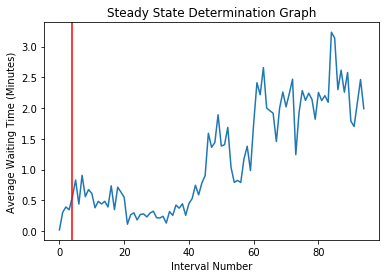

In [132]:
plt.plot(x, avgy)
plt.axvline(x=4, color="red")
plt.xlabel("Interval Number")
plt.ylabel("Average Waiting Time (Minutes)")
plt.title("Steady State Determination Graph")
plt.show()

In [101]:
1425 % 1440

1425

In [102]:
1455 % 1440

15

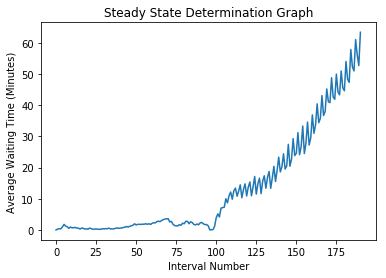

In [105]:
# 2 days 
y1 = [0.0, 0.1, 0.5083333333333334, 0.08333333333333333, 2.5, 5.15, 2.4, 1.65, 0.5166666666666667, 0.0, 0.45, 0.0, 0.2, 0.0, 0.55, 0.1, 0.4, 0.55, 0.05, 0.2333333333333333, 0.3, 0.5, 0.2, 0.5, 0.2, 0.16666666666666666, 0.1, 0.7, 0.03333333333333333, 0.26666666666666666, 0.5, 0.1, 0.2, 0.0, 0.03333333333333333, 0.05, 0.2, 1.2, 0.025, 0.13333333333333333, 0.0, 0.9, 1.8, 2.15, 0.6333333333333333, 0.05, 0.6, 0.0, 0.3, 0.1, 0.0, 0.5, 0.35, 1.0666666666666669, 0.23333333333333334, 1.3, 1.8666666666666665, 1.5, 2.4, 2.5333333333333337, 0.6, 0.9833333333333334, 0.5000000000000001, 3.1, 3.0166666666666666, 0.7, 0.0, 0.325, 0.2, 0.4, 0.2, 0.3, 0.9, 1.2666666666666666, 2.066666666666667, 1.8, 1.8833333333333335, 2.15, 0.7, 2.48, 0.3, 0.3916666666666667, 0.5, 0.23333333333333334, 1.4, 0.475, 0.7, 3.25, 4.366666666666666, 1.45, 2.625, 2.5333333333333337, 0.05, 3.075, 2.8666666666666663, 1.0, 0.0, 0.0, 0.0, 0.0, 3.5, 7.85, 1.8, 7.65, 11.75, 3.166666666666667, 9.35, 13.1, 7.0, 8.6, 19.4, 5.3, 9.6, 17.0, 6.8, 14.133333333333331, 16.8, 11.25, 2.7, 6.3, 2.9, 1.9, 1.5, 4.5, 7.1, 4.3, 5.9, 6.0, 0.0, 5.1, 1.05, 2.4, 1.5, 1.25, 1.5, 3.25, 4.55, 2.45, 4.4, 9.95, 7.4, 6.65, 11.4, 16.1, 9.5, 22.4, 22.3, 15.0, 22.9, 30.2, 18.15, 21.3, 25.0, 14.9, 21.15, 25.7, 14.6, 27.55, 33.85, 15.5, 31.3, 37.05, 23.4, 41.0, 42.4, 29.0, 45.75, 42.55, 28.0, 49.05, 51.8, 33.15, 55.1, 53.8, 34.4, 55.95, 53.6, 33.2, 59.61666666666666, 56.45, 39.1, 68.35, 57.55, 45.9, 72.1, 64.91666666666666, 45.2, 72.25, 69.5, 49.1, 78.35]
y2 = [0.0, 0.05, 0.2, 0.15, 0.1, 0.2, 0.275, 0.2, 0.45, 0.1, 0.6, 0.25, 0.95, 0.7833333333333333, 0.3, 0.2833333333333333, 0.15833333333333333, 0.75, 0.16666666666666666, 0.22999999999999998, 0.0, 1.35, 0.3, 0.0, 0.13333333333333333, 0.1, 0.3, 0.0, 0.5, 1.55, 0.1, 0.2, 0.1, 0.0, 1.0, 0.1, 0.0, 0.2, 0.3, 0.3, 0.05, 0.0, 1.4, 1.3, 1.2666666666666666, 0.4, 0.825, 0.8, 2.75, 4.083333333333333, 2.4166666666666665, 1.4666666666666666, 2.6333333333333333, 3.5, 0.45, 1.0, 0.45833333333333337, 1.0, 1.9666666666666663, 2.15, 2.5, 4.0, 2.6, 1.3, 0.2333333333333333, 0.4833333333333333, 1.5, 1.6, 2.95, 2.2666666666666666, 2.6, 0.7, 0.6666666666666667, 0.3083333333333333, 0.5, 0.6566666666666666, 1.15, 2.6166666666666667, 0.4, 0.6833333333333333, 1.5333333333333334, 1.5, 1.5333333333333334, 1.25, 1.0, 1.7666666666666664, 3.3833333333333337, 1.0, 1.65, 1.8083333333333331, 1.0, 1.25, 1.25, 1.9666666666666668, 3.166666666666667, 3.875, 0.0, 0.1, 0.1, 0.2, 0.95, 1.6, 0.0, 3.1, 0.1, 5.2, 8.2, 2.75, 12.35, 12.2, 4.6, 17.15, 13.2, 2.55, 9.25, 7.8, 0.0, 9.55, 8.7, 0.1, 9.5, 9.6, 0.1, 7.8, 8.9, 0.0, 5.4, 5.1, 0.05, 4.9, 3.3, 1.9, 3.7, 2.033333333333333, 0.3, 0.2, 1.95, 3.2, 2.8, 3.0, 5.6, 5.65, 2.8, 2.625, 3.85, 3.95, 3.4, 4.7, 6.3, 7.05, 5.2, 8.65, 1.1, 1.8, 3.05, 0.55, 1.8666666666666667, 3.1, 3.8, 4.5, 5.2, 5.5, 5.6, 6.35, 7.6, 8.35, 10.15, 8.5, 9.4, 8.55, 8.6, 9.8, 9.05, 5.15, 3.4, 2.95, 3.5, 0.0, 0.85, 0.3, 1.3, 3.0, 4.6, 10.05, 12.35, 6.5, 7.85, 7.466666666666667, 7.65, 9.766666666666667, 7.95]
y3 = [0.0, 0.1, 0.0, 0.7833333333333334, 0.4333333333333333, 0.16666666666666666, 0.7, 1.6833333333333336, 0.0, 0.0, 0.1, 0.65, 0.3333333333333333, 0.35, 0.55, 0.05, 0.125, 0.05, 0.65, 1.1, 0.0, 0.6, 0.23333333333333334, 0.225, 0.4, 0.05, 0.0, 0.0, 0.1, 0.18333333333333332, 0.0, 1.4, 0.6, 0.4, 0.3, 0.7, 0.16666666666666666, 0.35, 0.85, 0.1, 0.5, 1.3, 2.45, 3.5, 4.0, 4.5, 5.166666666666666, 6.0, 5.925, 5.45, 6.1, 5.65, 4.966666666666667, 5.6, 7.875, 6.8, 7.05, 6.425, 4.8, 4.1, 4.375, 4.3, 5.95, 6.9, 6.7, 7.2, 8.275, 8.516666666666667, 9.116666666666667, 9.125, 8.95, 7.833333333333333, 5.95, 4.7, 5.1, 4.525, 1.2, 1.65, 1.1666666666666667, 0.9416666666666667, 0.8, 0.8, 2.5333333333333337, 2.4666666666666663, 3.2166666666666663, 3.191666666666667, 0.5666666666666667, 2.0, 5.15, 4.18, 2.0, 4.55, 4.216666666666667, 0.1, 1.3083333333333333, 1.15, 0.0, 0.1, 0.0, 4.0, 4.05, 6.0, 13.7, 5.933333333333334, 5.0, 18.4, 6.85, 7.6, 21.433333333333334, 8.3, 8.5, 25.6, 8.6, 6.0, 24.6, 3.55, 2.9, 25.9, 3.65, 2.5, 30.2, 0.0, 0.85, 33.1, 3.2, 0.0, 34.9, 0.05, 0.0, 37.5, 1.7, 1.0, 42.6, 1.1, 2.3, 48.0, 4.8, 5.7, 50.6, 7.0, 3.25, 55.95, 7.0, 5.3, 56.1, 8.9, 8.85, 58.6, 10.2, 9.2, 60.55, 12.1, 12.7, 64.35, 18.5, 15.85, 68.8, 18.133333333333333, 18.3, 72.1, 20.8, 17.95, 75.25, 24.866666666666667, 24.3, 76.75, 24.3, 22.8, 82.85, 24.2, 24.3, 87.6, 29.6, 29.4, 89.75, 34.8, 35.3, 95.95, 36.5, 38.4, 95.0, 40.1, 37.85, 92.15, 44.7, 46.4, 96.73333333333333, 50.45, 46.3, 99.5, 52.9]
y4 = [0.03333333333333333, 0.05, 0.0, 0.5, 0.7166666666666667, 0.3, 0.25, 0.4, 0.4, 0.7666666666666667, 0.575, 0.08333333333333334, 0.15, 0.7, 1.8, 0.2, 0.5, 0.4, 0.2, 0.05, 0.2, 0.4, 0.1, 0.0, 0.25, 0.5, 0.0, 0.0, 0.1, 0.05, 0.36666666666666664, 0.3, 0.5, 0.4, 0.1, 0.6, 0.35, 0.3, 0.6333333333333333, 0.18333333333333332, 0.1, 0.2, 0.2, 0.0, 0.25, 0.05, 1.0, 0.03333333333333333, 0.1, 1.0, 1.6, 0.85, 0.16666666666666669, 0.06666666666666667, 0.4, 0.25, 0.26666666666666666, 0.0, 0.5, 0.7, 1.9, 1.5, 1.55, 0.6, 0.6666666666666667, 1.6166666666666665, 0.7, 1.2, 1.1333333333333333, 1.25, 2.05, 0.2, 1.1666666666666667, 0.35, 0.3, 1.2, 1.5, 2.6333333333333333, 1.6666666666666665, 2.45, 2.933333333333333, 2.85, 3.2, 3.066666666666667, 3.0, 4.225, 3.8, 3.85, 1.95, 3.5916666666666672, 4.5, 4.4, 3.25, 4.15, 3.15, 0.3666666666666667, 0.0, 0.0, 0.1, 2.9, 9.966666666666667, 4.85, 7.7, 14.7, 6.0, 13.65, 24.75, 8.0, 23.4, 31.71666666666667, 8.1, 27.1, 39.85, 10.7, 32.2, 47.75, 12.1, 39.7, 56.9, 16.0, 47.6, 58.75, 18.35, 43.6, 61.25, 19.2, 48.7, 65.25, 19.5, 52.1, 68.25, 21.5, 53.2, 69.25, 22.8, 48.9, 75.15, 24.3, 53.3, 79.25, 25.6, 52.2, 76.4, 27.1, 47.2, 79.55, 29.3, 48.5, 84.2, 31.1, 49.9, 86.65, 27.6, 56.2, 91.9, 29.5, 62.0, 102.6, 33.6, 70.1, 104.7, 37.75, 77.33333333333333, 115.4, 40.15, 81.56666666666668, 118.5, 40.5, 87.0, 117.0, 45.55, 92.5, 121.65, 48.7, 100.5, 131.35, 50.86666666666666, 107.0, 137.4, 53.46666666666666, 112.6, 138.15, 56.3, 115.8, 145.05, 61.75, 127.1, 158.75, 65.81666666666666, 137.1, 162.1]
y5 = [0.0, 0.20833333333333331, 0.4666666666666667, 0.1, 0.7, 1.5, 0.6, 1.0333333333333334, 0.3, 0.85, 0.31666666666666665, 0.23333333333333334, 1.5, 0.15, 0.3, 0.1, 0.2, 0.0, 0.8, 0.4, 0.25, 0.45, 0.1, 0.35, 0.3, 0.2, 0.0, 0.65, 0.5, 0.15, 0.0, 0.05, 0.0, 0.7, 0.3, 0.16666666666666666, 0.0, 0.36666666666666664, 0.9, 0.33333333333333337, 0.0, 0.2, 0.36666666666666664, 0.2, 0.2, 0.33333333333333337, 1.1166666666666667, 1.75, 2.55, 3.183333333333333, 1.15, 0.06666666666666667, 1.2166666666666666, 1.75, 1.7333333333333332, 1.0, 1.275, 0.85, 1.1333333333333333, 0.0, 0.7833333333333333, 1.35, 0.45, 0.3333333333333333, 0.1, 0.2, 2.5, 2.14, 0.3, 3.05, 2.425, 2.533333333333333, 2.8, 1.4166666666666665, 0.03333333333333333, 0.0, 0.8, 1.4, 2.05, 3.0, 0.225, 3.2833333333333328, 2.925, 0.5, 1.525, 2.05, 0.3, 0.275, 0.15, 0.26666666666666666, 1.15, 2.4, 2.0, 0.15, 0.0, 0.85, 0.0, 0.225, 0.15, 0.4, 11.75, 6.15, 2.25, 22.1, 12.6, 5.95, 36.55, 15.65, 8.95, 35.65, 16.0, 9.9, 36.85, 19.8, 5.6, 40.03333333333333, 20.45, 4.0, 47.95, 26.65, 2.6, 50.35, 24.6, 0.0, 50.3, 22.4, 0.3, 47.35, 23.5, 0.0, 53.86666666666666, 27.5, 0.2, 60.5, 30.133333333333333, 0.2, 62.1, 33.96666666666667, 0.0, 69.45, 38.233333333333334, 0.25, 72.15, 39.1, 4.1, 77.65, 32.55, 9.0, 75.55, 39.0, 9.9, 82.05, 45.65, 16.0, 88.55, 49.5, 18.8, 95.6, 60.35, 21.0, 100.7, 70.95, 25.8, 108.35, 75.75, 26.65, 112.45, 79.9, 28.45, 123.75, 86.75, 30.9, 127.95, 85.8, 26.6, 126.25, 83.4, 29.8, 128.05, 86.16666666666666, 21.6, 133.55, 85.5, 17.666666666666664, 134.5, 86.75, 22.6, 140.7, 89.1, 22.1, 150.2]
y6 = [0.0, 0.45, 0.85, 0.75, 1.55, 2.625, 1.35, 0.25, 0.55, 0.0, 0.4, 0.16666666666666666, 1.2, 0.075, 0.3, 1.3166666666666667, 2.0, 1.2666666666666668, 0.0, 0.0, 0.0, 0.05, 0.5, 0.16666666666666666, 0.0, 0.9, 0.45, 0.3, 0.0, 0.2, 0.2, 0.1, 0.35, 0.05, 0.15, 0.15, 0.7, 1.1, 0.8, 0.15, 0.15, 0.1, 0.45, 0.08333333333333333, 0.0, 0.5, 0.0, 0.25, 1.2333333333333332, 0.775, 0.25, 1.55, 1.0833333333333333, 0.2, 0.7166666666666668, 2.6, 1.45, 2.6, 3.8166666666666673, 2.7666666666666666, 2.55, 3.3333333333333335, 4.233333333333333, 3.05, 3.1, 3.7166666666666663, 3.7833333333333337, 4.283333333333333, 4.816666666666666, 5.083333333333334, 3.45, 2.3, 2.15, 2.15, 1.65, 0.2, 0.21666666666666665, 0.33333333333333337, 1.1, 1.0, 2.2833333333333337, 1.4833333333333334, 1.0966666666666667, 1.3333333333333335, 3.475, 2.4666666666666663, 1.5, 0.06666666666666667, 0.6666666666666667, 0.2, 1.2, 1.2, 0.38333333333333336, 0.3, 0.34500000000000003, 1.1, 0.0, 0.0, 0.05, 0.1, 0.0, 6.35, 4.3, 0.1, 14.9, 10.416666666666666, 0.0, 21.45, 12.0, 3.6666666666666665, 20.275, 14.65, 2.9, 27.5, 13.3, 0.0, 27.35, 12.8, 0.0, 31.1, 11.5, 0.2, 33.1, 13.3, 0.0, 36.0, 15.3, 4.05, 38.95, 14.6, 0.3, 40.45, 16.533333333333335, 1.5, 42.05, 17.9, 0.05, 50.516666666666666, 25.15, 0.36666666666666664, 56.633333333333326, 21.5, 2.8, 54.29166666666667, 19.2, 0.3, 54.56666666666668, 21.45, 3.9, 61.41666666666667, 23.6, 4.8, 63.01666666666667, 25.85, 4.9, 60.716666666666676, 24.8, 4.6, 63.33333333333333, 26.9, 6.3, 72.21666666666667, 30.85, 7.2, 81.08333333333333, 34.125, 9.5, 84.93333333333334, 35.45, 13.25, 92.55, 35.1, 13.3, 96.26666666666667, 37.35, 15.0, 103.63333333333335, 39.8, 10.5, 106.7, 43.8, 12.95, 115.96666666666665, 47.55, 14.6, 123.01666666666665, 52.45, 15.4, 128.76666666666665, 53.95, 16.6]
y7 = [0.0, 0.16666666666666666, 0.525, 0.15, 0.95, 2.5, 0.35833333333333334, 1.2, 0.26666666666666666, 1.15, 0.4, 0.45, 1.15, 0.2333333333333333, 0.16666666666666669, 0.0, 0.85, 1.2, 0.2, 0.4, 0.0, 0.4333333333333334, 1.4, 0.7, 0.05, 0.3, 0.4, 0.0, 0.5, 0.4, 0.7, 0.3, 0.2, 0.2, 0.3, 0.3, 0.6833333333333333, 0.7, 1.0166666666666668, 0.65, 1.0, 0.675, 0.8, 0.4, 2.65, 0.15, 0.16666666666666666, 0.4333333333333333, 0.5, 1.8, 2.6, 3.6666666666666665, 3.833333333333333, 3.3166666666666673, 2.675, 1.95, 2.05, 1.05, 0.7, 1.4, 2.65, 2.4, 2.8, 4.0, 4.766666666666667, 1.45, 1.65, 2.45, 2.45, 2.3, 2.341666666666667, 2.8, 4.733333333333333, 3.8416666666666663, 2.7, 2.4, 2.675, 3.15, 4.5, 6.15, 7.133333333333333, 10.116666666666667, 5.975, 2.05, 2.9, 2.85, 2.433333333333333, 2.95, 3.2, 2.7666666666666666, 4.7, 1.1833333333333333, 0.13333333333333333, 0.03333333333333333, 0.9, 0.8, 0.0, 0.0, 0.0, 0.4, 3.4, 3.95, 2.9, 6.55, 7.35, 4.55, 3.3, 4.9, 6.5, 6.533333333333333, 5.35, 4.5, 5.7, 7.0, 8.6, 7.2, 4.766666666666667, 1.2, 0.0, 2.5, 1.5, 0.4, 4.15, 0.0, 2.4, 2.0, 0.6, 0.0, 0.4, 0.0, 0.3, 0.6, 3.3, 4.7, 2.9, 0.5, 4.05, 3.2, 3.2, 5.95, 10.7, 2.05, 8.55, 9.983333333333334, 3.25, 12.65, 13.883333333333335, 4.45, 14.533333333333335, 16.6, 3.15, 12.85, 16.25, 3.0, 15.0, 16.7, 5.85, 14.0, 19.6, 7.1, 19.05, 25.4, 6.95, 17.85, 26.15, 11.75, 22.55, 32.96666666666666, 14.6, 25.7, 34.25, 14.2, 25.15, 31.75, 15.15, 22.733333333333334, 34.0, 15.55, 20.85, 29.03333333333333, 12.866666666666665, 19.65, 30.15, 17.3, 20.95, 33.45, 19.5, 24.85, 36.15, 18.7, 23.15]
y8 = [0.0, 0.8833333333333332, 0.4, 0.425, 1.6166666666666665, 2.533333333333333, 1.95, 1.1333333333333333, 2.25, 1.4, 2.566666666666667, 3.6, 2.6, 2.666666666666667, 0.225, 0.5, 1.3, 0.06666666666666667, 0.0, 0.18333333333333332, 0.05, 0.1, 0.0, 0.0, 0.9333333333333332, 1.0, 0.5, 0.0, 0.1, 0.4, 0.1, 0.13333333333333333, 0.0, 0.7, 0.0, 0.3, 0.2, 0.75, 0.2, 0.1, 0.1, 0.85, 0.16666666666666666, 0.3, 1.0666666666666667, 1.9833333333333332, 0.6, 1.25, 0.5, 0.5333333333333334, 0.5, 0.45, 0.2, 0.25, 1.3333333333333335, 0.85, 4.325, 2.316666666666667, 2.4833333333333334, 0.85, 1.75, 1.75, 1.4833333333333334, 2.5, 1.9333333333333336, 4.1, 4.1, 4.6, 6.191666666666667, 7.1, 8.041666666666666, 2.5166666666666666, 0.95, 0.7666666666666667, 0.09166666666666666, 0.05, 0.45, 0.7, 0.5833333333333333, 0.8, 0.85, 2.9, 4.7, 3.925, 4.1, 2.45, 1.3583333333333334, 0.2, 1.3033333333333332, 1.0, 2.1, 3.0, 2.433333333333333, 0.5833333333333333, 0.0, 1.7, 0.0, 0.15, 0.2, 0.0, 2.95, 4.366666666666666, 0.0, 3.55, 3.6, 0.2, 0.4, 0.0, 0.0, 0.3, 0.3, 0.6, 0.0, 0.0, 0.7, 0.7, 0.4, 0.3, 1.5, 0.55, 3.15, 2.05, 0.0, 3.65, 3.9, 0.15, 0.0, 0.5, 2.2, 3.0, 4.5, 5.633333333333334, 5.4, 5.4, 5.05, 3.6, 4.3, 4.85, 4.0, 6.4, 9.0, 6.8, 7.95, 7.4, 5.25, 7.6, 3.75, 6.05, 7.2, 9.15, 10.533333333333333, 11.4, 13.6, 15.05, 15.4, 7.55, 7.9, 3.4166666666666665, 0.0, 3.2, 2.35, 0.0, 4.6, 1.15, 2.3, 4.166666666666666, 2.55, 2.5, 6.4, 8.8, 12.0, 13.9, 17.1, 17.0, 17.75, 16.9, 18.2, 18.0, 18.0, 20.7, 26.7, 25.9, 26.7, 25.25, 27.2, 29.65, 31.4, 33.3, 36.0, 29.4, 30.3]
y9 = [0.0, 0.125, 0.65, 0.125, 0.4833333333333333, 2.55, 3.4666666666666663, 0.35, 0.0, 1.15, 0.2, 0.23333333333333334, 0.0, 0.8, 0.65, 0.3, 0.33333333333333337, 0.5, 0.65, 0.9, 0.5, 2.1, 1.0, 0.3, 0.0, 0.0, 0.05, 0.4, 0.0, 0.7, 0.0, 0.5, 0.3, 0.8666666666666666, 0.45, 0.75, 0.175, 0.0, 1.8666666666666667, 2.7, 3.6, 1.05, 0.1, 0.15, 0.7, 0.3, 2.1, 1.9166666666666665, 0.1, 1.2666666666666666, 0.44000000000000006, 1.8, 2.55, 1.35, 1.4, 0.6333333333333333, 0.95, 1.3166666666666667, 1.9833333333333332, 2.15, 3.875, 2.9, 2.333333333333333, 3.35, 4.7, 5.433333333333334, 5.833333333333334, 6.15, 5.8, 4.65, 5.15, 4.566666666666666, 3.55, 1.4166666666666665, 1.0833333333333335, 0.7, 1.3583333333333334, 1.9166666666666665, 1.3, 2.1, 3.175, 3.9, 4.716666666666667, 4.216666666666667, 4.8, 4.033333333333333, 2.8833333333333337, 1.05, 0.3333333333333333, 0.1, 0.95, 0.55, 2.5, 3.35, 2.0666666666666664, 0.5, 0.0, 0.15, 0.2, 4.166666666666666, 0.0, 2.3, 8.7, 0.3, 0.05, 11.3, 1.9, 2.033333333333333, 17.8, 0.5, 1.6, 20.7, 0.06666666666666667, 0.0, 23.3, 1.55, 0.2, 24.8, 0.7, 0.3, 28.2, 0.7, 0.5, 32.05, 0.3, 0.0, 36.7, 0.4, 0.2, 39.3, 0.3, 0.35, 41.8, 0.0, 0.15, 44.05, 0.2, 0.05, 46.8, 1.25, 0.0, 50.91666666666667, 0.8, 0.6, 56.8, 2.333333333333333, 3.55, 59.15, 3.233333333333333, 3.4, 64.85, 5.533333333333333, 2.2, 69.4, 5.066666666666666, 3.15, 73.5, 4.966666666666667, 0.7, 74.6, 4.8, 3.3, 85.75, 4.416666666666666, 4.65, 85.2, 5.533333333333333, 7.3, 87.3, 1.0, 6.15, 90.5, 3.35, 6.25, 93.9, 3.766666666666667, 8.6, 93.85, 1.75, 8.0, 93.05, 0.7, 10.25, 100.6, 5.7, 11.45, 106.7, 1.0, 14.15, 106.75, 1.1]
y10 = [0.0, 0.425, 0.15, 0.55, 0.775, 0.23333333333333334, 0.95, 2.325, 0.25, 3.9, 1.05, 1.325, 0.1, 0.05, 0.65, 0.0, 0.1, 0.3, 0.0, 0.05, 0.7, 0.1, 0.1, 0.0, 0.0, 0.0, 0.2, 0.13333333333333333, 0.05, 0.2, 1.1, 1.275, 1.5166666666666666, 2.55, 0.45, 0.2, 0.8, 0.15, 0.0, 0.2, 0.3, 0.85, 0.15, 0.5, 0.33333333333333337, 0.85, 0.1, 0.6, 1.2666666666666666, 1.325, 0.9, 1.8, 1.0833333333333335, 0.475, 1.6833333333333336, 1.7833333333333332, 0.26666666666666666, 0.7333333333333333, 0.2, 0.75, 0.31666666666666665, 0.4, 0.7, 1.8166666666666664, 2.7, 1.8583333333333332, 2.15, 1.8, 1.9, 0.15, 0.85, 1.6166666666666667, 4.6, 1.98, 0.4, 1.7, 1.6083333333333336, 0.35, 1.4, 1.9666666666666663, 0.4666666666666666, 0.35, 0.55, 0.6833333333333333, 0.925, 0.15, 0.75, 1.2, 0.25, 1.1, 2.6, 2.55, 3.1, 3.325, 3.25, 1.9, 0.0, 0.0, 0.25, 0.0, 2.5, 7.883333333333333, 0.2, 6.0, 10.15, 0.0, 8.8, 11.25, 0.0, 14.05, 14.3, 0.0, 17.4, 17.4, 0.0, 21.8, 18.2, 0.1, 25.6, 22.9, 0.0, 29.9, 26.4, 0.0, 33.9, 30.65, 0.0, 37.2, 31.6, 0.025, 40.0, 32.5, 0.0, 41.7, 26.05, 0.25, 46.83333333333333, 27.15, 0.03333333333333333, 50.8, 29.55, 0.5166666666666667, 54.3, 32.4, 0.0, 59.1, 32.05, 0.05, 64.65, 31.15, 0.0, 66.6, 34.05, 0.06666666666666667, 69.55, 35.75, 0.1, 71.875, 38.6, 0.25, 73.66666666666666, 39.65, 1.4, 77.6, 39.4, 0.2, 79.45, 44.8, 0.9333333333333333, 80.7, 49.05, 0.5, 85.65, 51.7, 0.06666666666666667, 89.85, 51.2, 0.0, 96.275, 56.35, 0.0, 97.825, 58.4, 0.75, 101.475, 58.866666666666674, 0.3, 106.11666666666665, 68.15, 0.7, 111.15833333333335]

ys = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]
avgy = []
for i in range(len(y1)):
    #if i > 3:
    this_i = []
    for y in ys:
        this_i.append(y[i])
    avgy.append(np.mean(this_i))
x = [v for v in range(len(y1))]

plt.plot(x, avgy)
plt.xlabel("Interval Number")
plt.ylabel("Average Waiting Time (Minutes)")
plt.title("Steady State Determination Graph")
plt.show()

In [116]:
avgy

[0.02033333333333333,
 0.30500000000000005,
 0.39333333333333337,
 0.34833333333333333,
 0.5566666666666668,
 0.8308333333333332,
 0.44000000000000006,
 0.9075000000000001,
 0.5599999999999999,
 0.6758333333333333,
 0.6125,
 0.38,
 0.485,
 0.4416666666666667,
 0.485,
 0.39333333333333337,
 0.7366666666666667,
 0.35,
 0.7148333333333332,
 0.6350000000000001,
 0.55,
 0.11333333333333333,
 0.2666666666666667,
 0.29833333333333334,
 0.18333333333333335,
 0.27166666666666667,
 0.28,
 0.23166666666666663,
 0.29333333333333333,
 0.325,
 0.21966666666666662,
 0.21333333333333332,
 0.24166666666666664,
 0.1325,
 0.3183333333333333,
 0.25666666666666665,
 0.42333333333333334,
 0.37333333333333335,
 0.445,
 0.2575,
 0.45000000000000007,
 0.53,
 0.7466666666666668,
 0.59,
 0.7833333333333334,
 0.9024999999999999,
 1.5908333333333333,
 1.3625,
 1.4400000000000002,
 1.8916666666666668,
 1.3833333333333333,
 1.405,
 1.6866666666666668,
 1.0375,
 0.7925000000000001,
 0.8251666666666667,
 0.79083333333

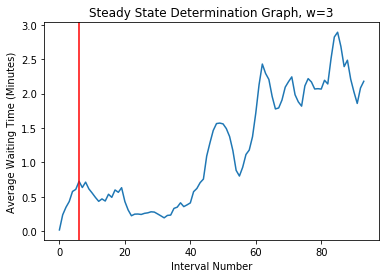

In [125]:
# do windows = 3

avgy_w3 = []
for i in range(0,len(avgy)):
    if i == 0:
        avgy_w3.append(avgy[i])
    elif i >= 2:
        avgy_w3.append((avgy[i-2] + avgy[i-1] + avgy[i])/3)

plt.plot([v for v in range(0,len(avgy_w3))], avgy_w3)
plt.axvline(x=6, color="red")
plt.xlabel("Interval Number")
plt.ylabel("Average Waiting Time (Minutes)")
plt.title("Steady State Determination Graph, w=3")
plt.show()

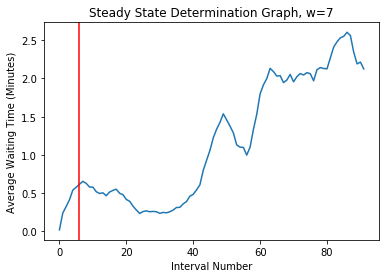

In [133]:
avgy_w7 = []
for i in range(0,len(avgy)):
    if i == 0:
        avgy_w7.append(avgy[i])
    elif i == 2:
        avgy_w7.append((avgy[0] + avgy[1] + avgy[2])/3)
    elif i == 4:
        avgy_w7.append((avgy[0] + avgy[1] + avgy[2] + avgy[3] + avgy[4])/5)
    elif i >= 6:
        avgy_w7.append((avgy[i-6] + avgy[i-5] + avgy[i-4] + avgy[i-3] + avgy[i-2] + avgy[i-1] + avgy[i])/7)
        
plt.plot([v for v in range(0,len(avgy_w7))], avgy_w7)
plt.axvline(x=6, color="red")
plt.xlabel("Interval Number")
plt.ylabel("Average Waiting Time (Minutes)")
plt.title("Steady State Determination Graph, w=7")
plt.show()

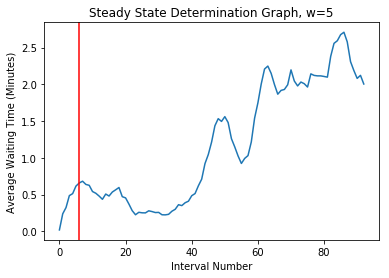

In [134]:
avgy_w5 = []
for i in range(0,len(avgy)):
    if i == 0:
        avgy_w5.append(avgy[i])
    elif i == 2:
        avgy_w5.append((avgy[0] + avgy[1] + avgy[2])/3)
    elif i >= 4:
        avgy_w5.append((avgy[i-4] + avgy[i-3] + avgy[i-2] + avgy[i-1] + avgy[i])/5)
        
plt.plot([v for v in range(0,len(avgy_w5))], avgy_w5)
plt.axvline(x=6, color="red")
plt.xlabel("Interval Number")
plt.ylabel("Average Waiting Time (Minutes)")
plt.title("Steady State Determination Graph, w=5")
plt.show()